<a href="https://colab.research.google.com/github/adawiaan/MidtermTask/blob/main/MidtermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Adawia Ananda

NPM: 2106724883

In [ ]:
# Step 1: Install necessary libraries
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install opencv-python
!pip install matplotlib
!pip install PyYAML

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


In [ ]:
# Step 2: Clone the YOLOv5 repository and install requirements
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17018, done.
remote: Counting objects: 100% (213/213), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 17018 (delta 120), reused 124 (delta 68), pack-reused 16805 (from 1)
Receiving objects: 100% (17018/17018), 15.73 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (11658/11658), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 23.3 MB/s eta 0:00:00


In [ ]:
# Step 3: Import necessary libraries for file upload
from google.colab import drive, files
import cv2
import pandas as pd
import torch
import numpy as np
import warnings

In [ ]:
# Step 4: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 5: Upload video file directly from your computer
uploaded = files.upload()  # This will prompt you to upload a file
video_path = next(iter(uploaded))  # Get the name of the uploaded file

Saving object_detection_4.mp4 to object_detection_4.mp4


In [ ]:
# Step 6: Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set confidence and IoU thresholds
conf_threshold = 0.25  # Confidence threshold
iou_threshold = 0.65   # IoU threshold

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-22 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 172MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Dictionary to store random colors for each class
colors = {}

# Function to generate a random color
def generate_random_color():
    return (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

In [ ]:
# Step 7: Open the video file and process it frame by frame
cap = cv2.VideoCapture(video_path)

# Get video properties for output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object to save output video
output_path = 'output_video.mp4'  # Update with your desired folder
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# List to hold detection results
all_detections = []

# Loop through video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame, size=640)  # Adjust the image size if needed

    # Extract relevant information from the results
    detections = []
    for result in results.xyxy[0]:  # results.xyxy[0] contains the detections
        x1, y1, x2, y2, conf, cls = result

        # Filter results based on confidence threshold
        if conf.item() >= conf_threshold:  # Confidence threshold check
            class_name = model.names[int(cls.item())]
            detections.append({
                "x1": x1.item(),
                "y1": y1.item(),
                "x2": x2.item(),
                "y2": y2.item(),
                "confidence": conf.item(),
                "class": class_name
            })

            # Assign a random color if the class is not already in the colors dictionary
            if class_name not in colors:
                colors[class_name] = generate_random_color()
            color = colors[class_name]

            # Draw bounding boxes on the frame
            frame = cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)

            # Prepare label with opaque background
            label = f"{class_name} {conf:.2f}"
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            frame = cv2.rectangle(frame, (int(x1), int(y1) - h - 10), (int(x1) + w, int(y1)), color, -1)  # Opaque background
            frame = cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    all_detections.extend(detections)  # Store all detections

    # Write the frame with the bounding boxes to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.am

In [ ]:
# Step 8: Convert detections to a DataFrame for analysis
detections_df = pd.DataFrame(all_detections)
print(detections_df.head())

           x1          y1          x2          y2  confidence   class
0  745.363220  409.823364  854.045715  497.949219    0.534755     bus
1  349.833191  460.848267  383.709412  524.501709    0.438055  person
2  562.953613  473.665131  579.553711  511.802429    0.399513  person
3  470.020691  447.743713  524.739868  478.015259    0.363414     car
4  506.372070  471.259705  529.521118  519.240662    0.309441  person


In [ ]:
# Step 9: Provide a link to download the output video
from google.colab import files
files.download(output_path)  # Download the output video

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Result of Object Detection Analysis in Daytime:

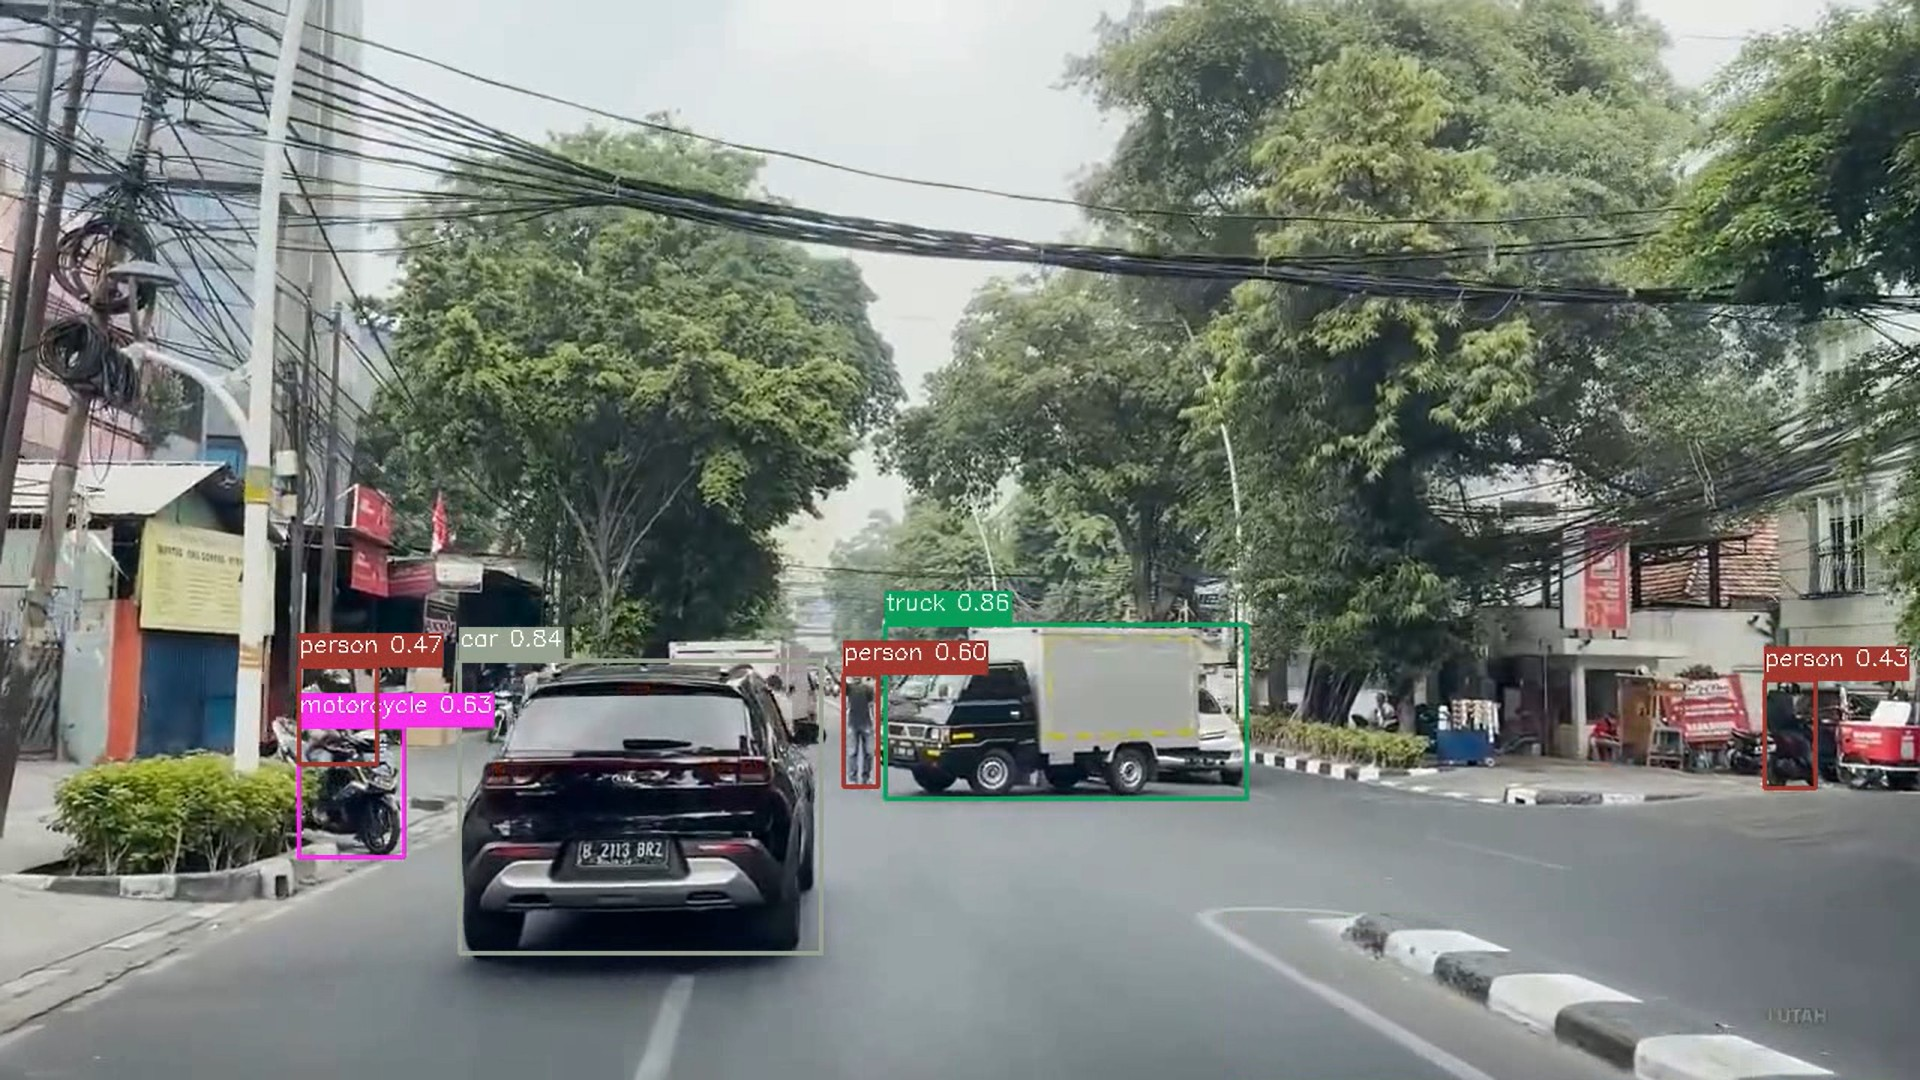

Result of Object Detection Analysis in Nighttime:

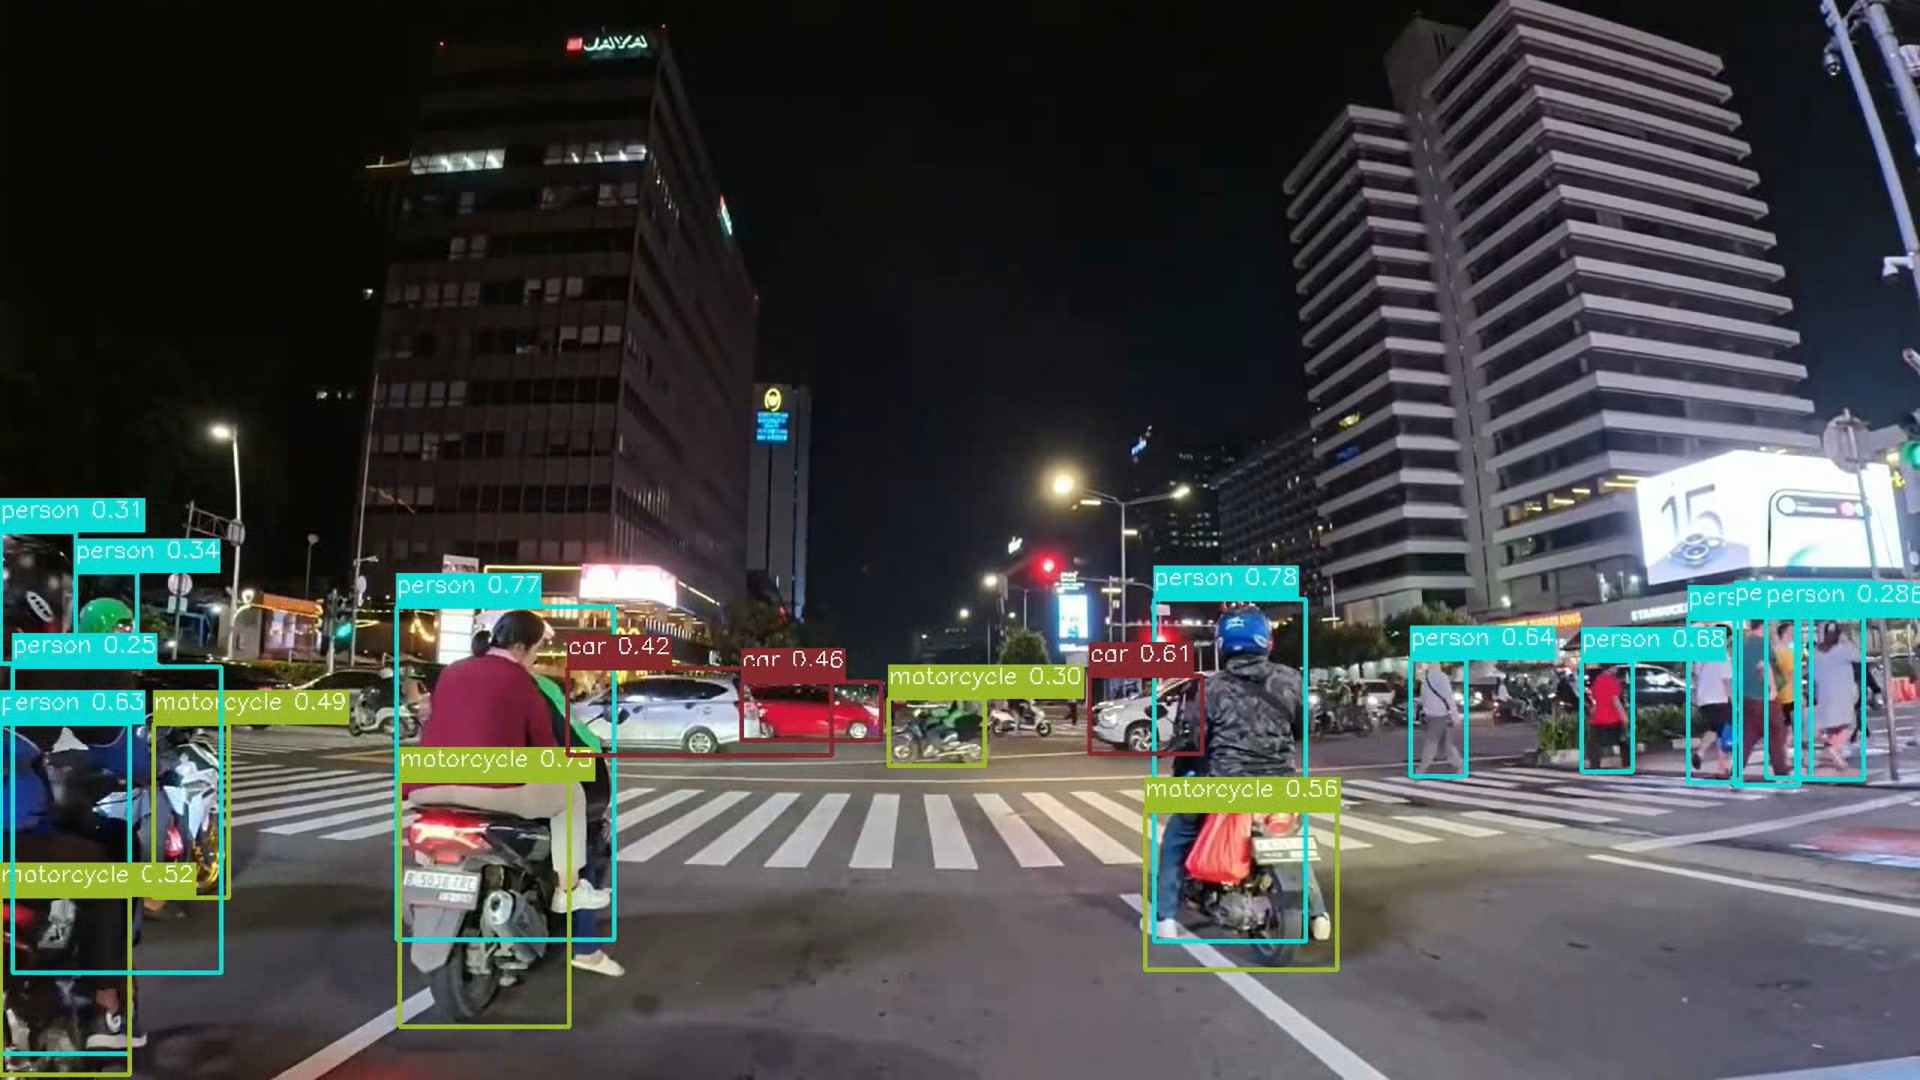